In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

0                0
1          2000000
2          4000000
3          6000000
4          8000000
           ...    
996     1992000000
997     1994000000
998     1996000000
999     1998000000
1000    2000000000
Name: Frequency, Length: 1001, dtype: int64


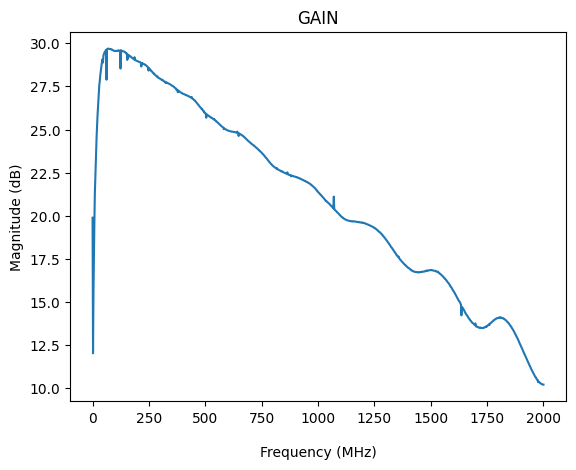

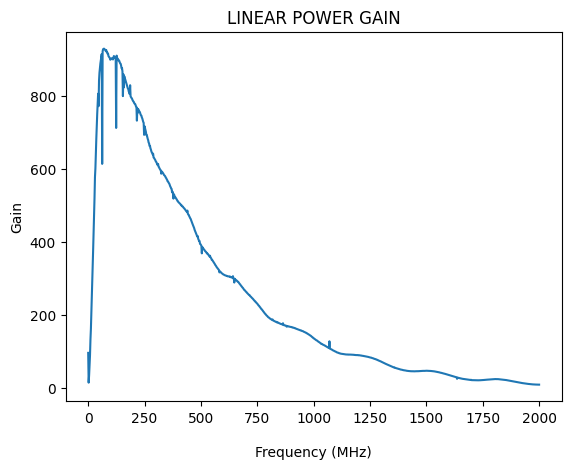

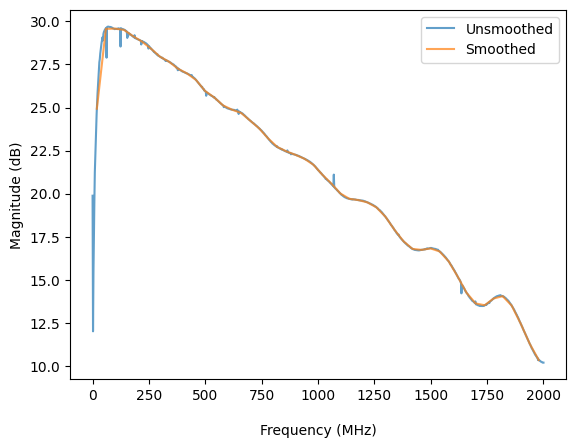

In [15]:
filename = 'Test2AmpData.csv'

# Read data from CSV file
data = pd.read_csv(filename)
print(data['Frequency'])
freqs = np.asarray(data['Frequency'])/1E6
gain = np.asarray(data['S21_Magnitude'])
plt.plot(freqs, gain)
plt.xlabel('Frequency (MHz)', labelpad = 15)
plt.ylabel('Magnitude (dB)')
plt.title('GAIN')
plt.show()

gainLin = 10**(gain/10.)
plt.plot(freqs, gainLin)
plt.xlabel('Frequency (MHz)', labelpad = 15)
plt.ylabel('Gain')
plt.title('LINEAR POWER GAIN')
plt.show()



smoothFactor = 20

holder = [x for x in gain[:-1]]
smoothedGain = np.median(np.reshape(holder, (-1, smoothFactor)), axis = 1)

holder = [x for x in freqs[:-1]]
smoothedFreqs = np.median(np.reshape(holder, (-1, smoothFactor)), axis = 1)


plt.plot(freqs, gain, label = 'Unsmoothed', alpha = 0.7)
plt.plot(smoothedFreqs, smoothedGain, label = 'Smoothed', alpha = 0.7)
plt.xlabel('Frequency (MHz)', labelpad = 15)
plt.ylabel('Magnitude (dB)')
plt.legend()
plt.show()





S21: [19.88987941 12.03050849 15.52699468 ... 10.21647788 10.21709984
 10.21588642]
S12: [ -6.06789269 -55.86967806 -50.94998283 ... -25.17160049 -25.15380116
 -25.27595613]


Text(0.5, 1.0, 'REACTANCE OF S11')

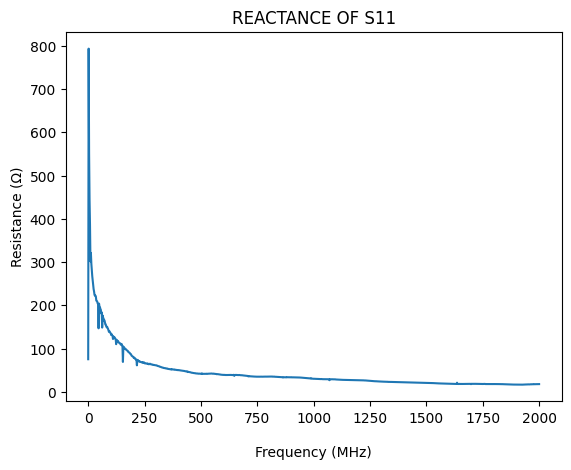

In [17]:
s21 = np.asarray(data['S21_Magnitude'])
s12 = np.asarray(data['S12_Magnitude'])

print('S21: ' + str(s21) + '\nS12: ' + str(s12))

magS11 = data['S11_Magnitude']
reacS11 = data['S11_Reactance']
resS11 = data['S11_Resistance']

plt.plot(freqs, resS11)
plt.xlabel('Frequency (MHz)', labelpad = 15)
plt.ylabel(u'Resistance (\u03A9)')
plt.title('REACTANCE OF S11')



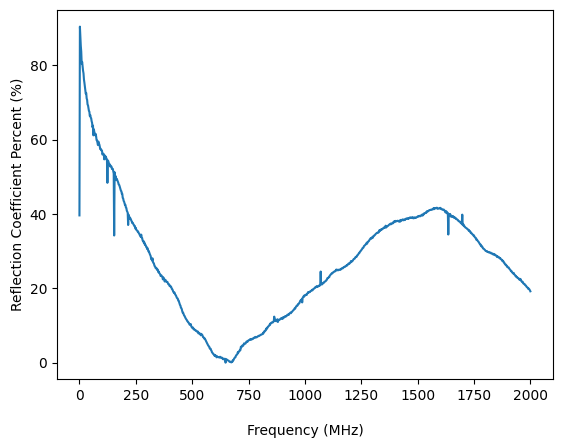

In [22]:
totalZ = np.sqrt(reacS11**2 + resS11**2)
print(totalZ)
print(magS11)

gamma = np.abs((50 - totalZ)/(50 + totalZ))

plt.plot(freqs, gamma*100)
plt.xlabel('Frequency (MHz)', labelpad = 15)
plt.ylabel('Reflection Coefficient Percent (%)')
plt.show()